<a href="https://colab.research.google.com/github/kamalova/Capstone/blob/main/dataload_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)
import string
string.punctuation
import re
from sklearn.feature_extraction.text import TfidfVectorizer


# Data visualization
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
# Seaborn's beautiful styling
import seaborn as sns
sns.set_style('whitegrid', {'axes.facecolor': '0.9'})

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud

In [3]:
%rm -rf sample_data/

In [4]:
# Downloading datasets
reviews_sd = pd.read_csv('/content/reviews_sd.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False, nrows=10000);
reviews_scl = pd.read_csv('/content/reviews_scl.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False, nrows=10000);
reviews_scr = pd.read_csv('/content/reviews_scr.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False, nrows=10000);
reviews_sf = pd.read_csv('/content/reviews_sf.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False, nrows=10000);
reviews_sm = pd.read_csv('/content/reviews_sm.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False, nrows=10000);
reviews_la = pd.read_csv('/content/reviews_la.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False, nrows=10000);
reviews_oak = pd.read_csv('/content/reviews_oak.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False, nrows=10000);
reviews_pg = pd.read_csv('/content/reviews_pg.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False, nrows=10000);

In [100]:
print(reviews_sd.shape, reviews_scl.shape, reviews_scr.shape, reviews_sf.shape,
      reviews_sm.shape, reviews_la.shape, reviews_oak.shape, reviews_pg.shape
      )

(10000, 6) (10000, 6) (10000, 6) (10000, 6) (10000, 6) (10000, 6) (10000, 6) (10000, 6)


In [7]:
#reviews_sd


In [125]:
df_reviews = pd.concat([reviews_scl,reviews_scr, reviews_sd,reviews_sf,reviews_sm,reviews_la, reviews_oak, reviews_pg])

In [102]:
df_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,26445399,297987565,2018-07-28,3558426,Barry,This cottage has everything you need and is centerally locates on the peninsula. Walking access to great restaurants in Palo Alto. Short drive or bike ride to Stanford’s campus.
1,26445399,770057849,2021-06-13,8627033,Paulette,Enjoyed our stay very much and would stay here again.
2,26445399,398555253897209391,2021-07-03,75784163,Maxime,"Great studio in the heart of Menlo Park, close to Downtown Palo Alto and restaurants! The studio is not huge but very well arranged, and contains everything we needed during our stay. Sandra was super helpful, I can only recommend you stay at her place!"
3,26445399,409426845056861199,2021-07-18,259305933,Emily,"Great location, friendly community, safe, beautiful neighborhood, very walkable. Property matched description. I would recommend.<br/> <br/>Sandra and Carl were also very accomodating and offered thoughtful recommendations."
4,26445399,418126732383403544,2021-07-30,43307267,Tengpeng,Sandra is super nice and friendly. The place has almost everything we need. There are restaurants and markets within walking distance. I can't ask for more at this price. Really enjoy the stay.
...,...,...,...,...,...,...
9995,1691675,33590247,2015-05-30,30927390,Sabina,"We had a wonderful stay at this house.<br/>Dave was there when we arrived. He showed us around and had a great bottle of wine for us.<br/>The house is on a quiet street and has a well equipped kitchen, living room entertainment center and everything you might need for a home away from home. The wifi worked great as well.<br/>He has a great selection of books and movies as well.<br/>Very convenient to downtown Palo Alto.<br/><br/>We loved our stay here and would definitely highly recommend it.<br/><br/>"
9996,1691675,34933621,2015-06-14,27281609,Timothy,Everything was accurate per the listing - very pleased with the experience and would stay there on next trip to palo alto
9997,1691675,35455551,2015-06-19,29891654,Mark,"Dave was very welcoming. The house was nice and clean and very conveniently located. Everything we needed was there, and I recommend the home unreservedly.\r<br/>"
9998,1691675,36047412,2015-06-24,1375568,Sid,Great location and David was excellent at arranging key hand-off and following up afterwards. A+.


In [103]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     50000 non-null  int64 
 1   id             50000 non-null  int64 
 2   date           50000 non-null  object
 3   reviewer_id    50000 non-null  int64 
 4   reviewer_name  50000 non-null  object
 5   comments       49996 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.7+ MB


In [11]:
df_reviews.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         4
dtype: int64

In [150]:
df_reviews = df_reviews.drop(columns=['id','date','reviewer_name'])

In [116]:
df_reviews.dropna(subset =['comments'],how='any',axis=0,inplace=True)

In [117]:
df_reviews['comments'].str.match('The host canceled this reservation').sum()

207

In [24]:
#! pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 13.8 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=c6dfff5a0d16d728166610fded49935402979785cef9a1ae1e4293e2a6586d6f
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [25]:
# Language detect
from langdetect import detect

In [127]:
def detect_lang(x):
    try:
        lang = detect(x)
    except:
        lang = 'other'
    return lang

df_reviews['language'] = df_reviews['comments'].apply(detect_lang)

In [128]:
df_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments,language
0,26445399,297987565,2018-07-28,3558426,Barry,This cottage has everything you need and is centerally locates on the peninsula. Walking access to great restaurants in Palo Alto. Short drive or bike ride to Stanford’s campus.,en
1,26445399,770057849,2021-06-13,8627033,Paulette,Enjoyed our stay very much and would stay here again.,en
2,26445399,398555253897209391,2021-07-03,75784163,Maxime,"Great studio in the heart of Menlo Park, close to Downtown Palo Alto and restaurants! The studio is not huge but very well arranged, and contains everything we needed during our stay. Sandra was super helpful, I can only recommend you stay at her place!",en
3,26445399,409426845056861199,2021-07-18,259305933,Emily,"Great location, friendly community, safe, beautiful neighborhood, very walkable. Property matched description. I would recommend.<br/> <br/>Sandra and Carl were also very accomodating and offered thoughtful recommendations.",en
4,26445399,418126732383403544,2021-07-30,43307267,Tengpeng,Sandra is super nice and friendly. The place has almost everything we need. There are restaurants and markets within walking distance. I can't ask for more at this price. Really enjoy the stay.,en
...,...,...,...,...,...,...,...
9995,7753356,576189410,2019-12-12,19358386,Julie,My husband and I enjoyed our stay with Li. Li ensured that everything went smoothly with prompt and clear communication. The unit was sparkling clean which we really appreciate. Big bonus - delicious homemade apple pie - yum! Thanks Li!,en
9996,7753356,577708082,2019-12-15,28510914,Filip,"This is an amazing place to stay if you're interested in exploring the Pebble Beach / Monterey / Carmel area -- very centrally located and includes great amenities such as free access to the 17-mi Drive and guest passes to the Monterey aquarium. Li is very kind and helpful, quickly responds to all messages and is more than happy to offer tips and suggestions on what you can do while in town. The suite where you will be staying is very nicely arranged and includes all the amenities you might need for a short vacation. A true gem! We would definitely come back!",en
9997,7753356,579830234,2019-12-21,105058889,Vivian,Li’s place is quiet and clean. We arrived later in the night and even saw some friendly deer. Li’s place is quite cozy and the bed is comfortable. We took advantage of the free aquarium tickets and enjoyed our trip to Monterey. Would definitely recommend!,en
9998,7753356,580499559,2019-12-22,111435487,Monise,We had a great stay at Li’s place! She is very sweet and also responds quickly. She makes sure that we are comfortable and have everything you need. The location is amazing and is so peaceful. The place is small but is perfect for two people and has everything you need. Shower products are also provided. After checking out we went to Carmel beach which is only a few minutes away from Li’s place. We thoroughly enjoyed the place and the Monterey passes and would love to be back next time!,en


In [129]:
df_reviews.language.value_counts()

en       77143
fr         788
de         514
zh-cn      330
es         256
ro         158
it          94
other       82
ko          72
nl          70
pt          59
af          57
ca          44
ja          42
ru          32
so          29
sv          28
tl          27
da          25
cs          22
no          20
zh-tw       18
cy          14
sw          13
hr          11
hu          10
pl           9
id           8
et           7
fi           4
vi           3
sk           3
sl           2
tr           2
lv           1
th           1
lt           1
he           1
Name: language, dtype: int64

In [130]:
df_reviews.loc[df_reviews['language']=='hr']

,listing_id,id,date,reviewer_id,reviewer_name,comments,language
3499,70829,348423242,2018-11-13,7836245,Sean,amazing place!,hr
3977,126012,409420421,2019-02-07,223790577,Sean,Amazing place!,hr
5429,62949,171419838,2017-07-17,36586450,Catarina,Amazing place!,hr
7588,396390,438970418839894104,2021-08-28,412587297,Danny,No privacy,hr
4724,258873,463095824,2019-06-02,235588434,Alex,Amazing place!,hr
6761,1115287,357267770,2018-12-09,228552193,Ke,amazing place!,hr
4131,67089,579043521,2019-12-19,99818452,Gizelle,Amazing place,hr
5545,9140,158235936,2017-06-05,12335726,Al,Amazing spot.,hr
8231,254259,115552389,2016-11-25,74539858,Liu,good place,hr
8766,869648,233702641,2018-02-10,171357983,David,Amazing. <br/><br/>Period.,hr


In [188]:
df_reviews = df_reviews.loc[(df_reviews['language'] == 'en')] 

In [189]:
df_reviews.language.value_counts()

en    77143
Name: language, dtype: int64

In [133]:
def clean_text(text):
    '''
    input- 'text' to be preprocessed
    output- converts input 'text' to lowercase,remove square brackets,links,punctuation 
    and words containing numbers. Removes common accent characters and returns clean text. 
    '''
    text = text.lower()
    text = re.sub('<br\s?\/>|<br>',"", text)
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text) # removes punctuations
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
    return text

In [190]:
df_reviews['comments'] = df_reviews['comments'].apply(lambda x: clean_text(x))
df_reviews.head()

,listing_id,reviewer_id,comments,language,text_length,polarity
0,26445399,3558426,cottage ha everything need centerally locates peninsula walking access great restaurant palo alto short drive bike ride stanford campus,en,179,0.0
1,26445399,8627033,enjoyed stay much would stay,en,53,0.0
2,26445399,75784163,great studio heart menlo park close downtown palo alto restaurant studio huge well arranged contains everything needed stay sandra wa super helpful recommend stay place,en,253,0.0
3,26445399,259305933,great location friendly community safe beautiful neighborhood walkable property matched description would recommend sandra carl also accomodating offered thoughtful recommendation,en,214,0.0
4,26445399,43307267,sandra super nice friendly place ha almost everything need restaurant market within walking distance ask price really enjoy stay,en,193,0.0


In [191]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [192]:
df_reviews['comments'] = df_reviews['comments'].apply(lambda x: remove_emoji(x))

In [193]:
df_reviews.reset_index(inplace=True, drop=True)

In [194]:
df_reviews['text_length'] = df_reviews['comments'].apply(lambda x : len(x))
df_reviews.head(4)

,listing_id,reviewer_id,comments,language,text_length,polarity
0,26445399,3558426,cottage ha everything need centerally locates peninsula walking access great restaurant palo alto short drive bike ride stanford campus,en,193,0.0
1,26445399,8627033,enjoyed stay much would stay,en,44,0.0
2,26445399,75784163,great studio heart menlo park close downtown palo alto restaurant studio huge well arranged contains everything needed stay sandra wa super helpful recommend stay place,en,244,0.0
3,26445399,259305933,great location friendly community safe beautiful neighborhood walkable property matched description would recommend sandra carl also accomodating offered thoughtful recommendation,en,240,0.0


In [68]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [196]:
#df_reviews

In [199]:
df_reviews.head()

,listing_id,reviewer_id,comments,language,text_length,polarity
0,26445399,3558426,"[ , , c, g, e, , , , , h, , , , , e, v, e, r, h, n, g, , , , , n, e, e, , , , , c, e, n, e, r, l, l, , , , , l, c, e, , , , , p, e, n, n, u, l, , , , , w, l, k, n, g, , , , , c, c, e, , , , , g, r, e, , , , , r, e, u, r, n, , , , , p, l, , , , , l, , ...]",en,193,0.0
1,26445399,8627033,"[ , , e, n, j, e, , , , , , , , , u, c, h, , , , , w, u, l, , , , , , ]",en,44,0.0
2,26445399,75784163,"[ , , g, r, e, , , , , u, , , , , h, e, r, , , , , e, n, l, , , , , p, r, k, , , , , c, l, e, , , , , w, n, w, n, , , , , p, l, , , , , l, , , , , r, e, u, r, n, , , , , u, , , , , h, u, g, e, , , , , w, e, l, l, , , , , r, r, n, g, e, , , , , ...]",en,244,0.0
3,26445399,259305933,"[ , , g, r, e, , , , , l, c, n, , , , , f, r, e, n, l, , , , , c, u, n, , , , , f, e, , , , , b, e, u, f, u, l, , , , , n, e, g, h, b, r, h, , , , , w, l, k, b, l, e, , , , , p, r, p, e, r, , , , , c, h, e, , , , , e, c, r, p, n, , , , , w, u, l, , , , ...]",en,240,0.0
4,26445399,43307267,"[ , , n, r, , , , , u, p, e, r, , , , , n, c, e, , , , , f, r, e, n, l, , , , , p, l, c, e, , , , , h, , , , , l, , , , , e, v, e, r, h, n, g, , , , , n, e, e, , , , , r, e, u, r, n, , , , , r, k, e, , , , , w, h, n, , , , , w, l, k, n, g, , , , , ...]",en,186,0.0


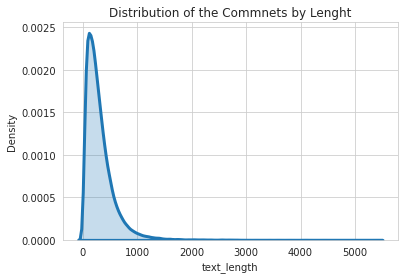

In [144]:
# Plot distribution of the Comment Lenghth
sns.distplot(df_reviews['text_length'],hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}).set(title='Distribution of the Commnets by Lenght')
plt.show();

In [145]:
df_reviews.shape

(77143, 8)

In [151]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77143 entries, 0 to 77142
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   77143 non-null  int64 
 1   reviewer_id  77143 non-null  int64 
 2   comments     77143 non-null  object
 3   language     77143 non-null  object
 4   text_length  77143 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.9+ MB


In [154]:
df_reviews

,listing_id,reviewer_id,comments,language,text_length
0,26445399,3558426,"['cottage', 'ha', 'everything', 'need', 'centerally', 'locates', 'peninsula', 'walking', 'access', 'great', 'restaurant', 'palo', 'alto', 'short', 'drive', 'bike', 'ride', 'stanford', 'campus']",en,179
1,26445399,8627033,"['enjoyed', 'stay', 'much', 'would', 'stay']",en,53
2,26445399,75784163,"['great', 'studio', 'heart', 'menlo', 'park', 'close', 'downtown', 'palo', 'alto', 'restaurant', 'studio', 'huge', 'well', 'arranged', 'contains', 'everything', 'needed', 'stay', 'sandra', 'wa', 'super', 'helpful', 'recommend', 'stay', 'place']",en,253
3,26445399,259305933,"['great', 'location', 'friendly', 'community', 'safe', 'beautiful', 'neighborhood', 'walkable', 'property', 'matched', 'description', 'would', 'recommend', 'sandra', 'carl', 'also', 'accomodating', 'offered', 'thoughtful', 'recommendation']",en,214
4,26445399,43307267,"['sandra', 'super', 'nice', 'friendly', 'place', 'ha', 'almost', 'everything', 'need', 'restaurant', 'market', 'within', 'walking', 'distance', 'ask', 'price', 'really', 'enjoy', 'stay']",en,193
...,...,...,...,...,...
77138,7753356,19358386,"['husband', 'enjoyed', 'stay', 'li', 'li', 'ensured', 'everything', 'went', 'smoothly', 'prompt', 'clear', 'communication', 'unit', 'wa', 'sparkling', 'clean', 'really', 'appreciate', 'big', 'bonus', 'delicious', 'homemade', 'apple', 'pie', 'yum', 'thanks', 'li']",en,240
77139,7753356,28510914,"['amazing', 'place', 'stay', 'interested', 'exploring', 'pebble', 'beach', 'monterey', 'carmel', 'area', 'centrally', 'located', 'includes', 'great', 'amenity', 'free', 'access', 'mi', 'drive', 'guest', 'pass', 'monterey', 'aquarium', 'li', 'kind', 'helpful', 'quickly', 'responds', 'message', 'happy', 'offer', 'tip', 'suggestion', 'town', 'suite', 'staying', 'nicely', 'arranged', 'includes', 'amenity', 'might', 'need', 'short', 'vacation', 'true', 'gem', 'would', 'definitely', 'come', 'back']",en,564
77140,7753356,105058889,"['li', 'place', 'quiet', 'clean', 'arrived', 'later', 'night', 'even', 'saw', 'friendly', 'deer', 'li', 'place', 'quite', 'cozy', 'bed', 'comfortable', 'took', 'advantage', 'free', 'aquarium', 'ticket', 'enjoyed', 'trip', 'monterey', 'would', 'definitely', 'recommend']",en,255
77141,7753356,111435487,"['great', 'stay', 'li', 'place', 'sweet', 'also', 'responds', 'quickly', 'make', 'sure', 'comfortable', 'everything', 'need', 'location', 'amazing', 'peaceful', 'place', 'small', 'perfect', 'two', 'people', 'ha', 'everything', 'need', 'shower', 'product', 'also', 'provided', 'checking', 'went', 'carmel', 'beach', 'minute', 'away', 'li', 'place', 'thoroughly', 'enjoyed', 'place', 'monterey', 'pass', 'would', 'love', 'back', 'next', 'time']",en,491


In [155]:
# Tfidfvectorizer computes word counts, idf and tf-idf values all at once
 
# compute IDF values (Inverse Document Frequency), weight assigned to each word depending on how commonly used
vectorizer = TfidfVectorizer(min_df=53, max_features=50, stop_words='english', lowercase=False, ngram_range=(1,1), use_idf=True)
matrix = vectorizer.fit_transform(df_reviews['comments'])


In [156]:
# see first vector, IDF values for first comment

pd.DataFrame(matrix[0].T.todense(), index=vectorizer.get_feature_names(), 
             columns=["tfidf"]).sort_values(['tfidf'], ascending=False).style.bar(subset=['tfidf'], color=['#5fba7d'])

,tfidf
cottage,0.525214
ha,0.473759
need,0.471247
restaurant,0.462370
great,0.252671
amazing,0.000000
really,0.000000
needed,0.000000
neighborhood,0.000000
nice,0.000000


In [157]:
df_reviews['comments'][27]

"['great', 'place', 'great', 'host', 'great', 'location', 'enough', 'said']"

### Estimate polarity

In [40]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [158]:
analyzer = SentimentIntensityAnalyzer()

In [159]:
# test it out on first comment

def sentiment_analyzer_scores(comment):
    score = analyzer.polarity_scores(comment)
    return(pd.DataFrame.from_dict(score, orient='index'))

sentiment_analyzer_scores(df_reviews['comments'][27])

,0
neg,0.0
neu,1.0
pos,0.0
compound,0.0


In [160]:
# we want one overall polarity score, so just look at the 'compound' score

compound_polarity= lambda s: (analyzer.polarity_scores(s))['compound']

In [161]:
df_reviews['polarity'] = df_reviews.comments.map(compound_polarity)

In [162]:
df_reviews[:5].style.bar(subset=['polarity'], align='mid', color=['#d65f5f', '#5fba7d'])

,listing_id,reviewer_id,comments,language,text_length,polarity
0,26445399,3558426,"['cottage', 'ha', 'everything', 'need', 'centerally', 'locates', 'peninsula', 'walking', 'access', 'great', 'restaurant', 'palo', 'alto', 'short', 'drive', 'bike', 'ride', 'stanford', 'campus']",en,179,0.000000
1,26445399,8627033,"['enjoyed', 'stay', 'much', 'would', 'stay']",en,53,0.000000
2,26445399,75784163,"['great', 'studio', 'heart', 'menlo', 'park', 'close', 'downtown', 'palo', 'alto', 'restaurant', 'studio', 'huge', 'well', 'arranged', 'contains', 'everything', 'needed', 'stay', 'sandra', 'wa', 'super', 'helpful', 'recommend', 'stay', 'place']",en,253,0.000000
3,26445399,259305933,"['great', 'location', 'friendly', 'community', 'safe', 'beautiful', 'neighborhood', 'walkable', 'property', 'matched', 'description', 'would', 'recommend', 'sandra', 'carl', 'also', 'accomodating', 'offered', 'thoughtful', 'recommendation']",en,214,0.000000
4,26445399,43307267,"['sandra', 'super', 'nice', 'friendly', 'place', 'ha', 'almost', 'everything', 'need', 'restaurant', 'market', 'within', 'walking', 'distance', 'ask', 'price', 'really', 'enjoy', 'stay']",en,193,0.000000


In [46]:
df_reviews[df_reviews['polarity']<0][:5].style.bar(subset=['polarity'], align='mid', color=['#d65f5f', '#5fba7d'])

,listing_id,id,date,reviewer_id,reviewer_name,comments,text_length,language,polarity
23,20802498,301206640,2018-08-03,23736851,Uri,do not pay more than for this house otherwise get a hotel room as until renovated just a bit this is not a good catch,119,en,-0.275500
59,1353178,10120145,2014-02-01,1544808,Jeanne,rob and vic family class acts,30,en,-0.557400
415,2943488,198532110,2017-09-29,66031497,Oleg,good location well organized place but very bad communication host wanted to charge extra then for every min after posted check out time after i called and the host confirmed it was ok i called apologizing for still being there host said was ok to be late and would call me back the host had not call back and i left the place noon the host then demanded extra fees i refused,390,en,-0.570400
574,1364787,301805298,2018-08-04,168462305,Olivia,the host carina had a very strict cancellation policy so i didn t get a chance to stay there i tried to get a refund and carina offered only the cleaning fee but i never saw that the cleaning fee was refunded i was not happy dealing with her because she was not flexible and would not give me my money back even though i gave her plenty of notice that my brother forgot about my trip the host was not understanding at all this was stressful to deal with be aware that she will not give you a refund at all,505,en,-0.869400
601,1364787,766060626,2021-06-04,342057388,Tamara,this is the worst travel experience i have ever had do not stay with this host unless you want to be stranded in a strange city with nowhere to stayi flew into the us with the two doses of the pfizer vaccine plus the covid test required by delta airlines i told the host carina that i was flying directly from buenos aires and she accepted both my booking and payment i hidden by airbnb ed her from the airport to tell her i had arrived at pm she asked when i would be coming when i arrived at her house less than hours later she told me i had to be quarantined in a hotel for days nowhere in the airbnb home description nor during our hidden by airbnb exchanges was there any mention of quarantine yet she wouldn t let me in her house i was left out in the streets and had to call the police i am years old and it was extremely upsetting to be stranded in a foreign cityairbnb has been involved and ruled in my favor and thankfully reimbursed the whole amount of the booking plus fifty percent of the sheraton hotel billdo not recommend,1048,en,-0.542800


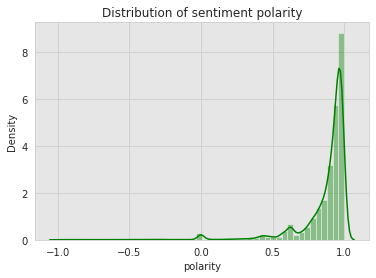

In [47]:
sns.distplot(df_reviews['polarity'], norm_hist=True, color='g')
plt.title('Distribution of sentiment polarity');

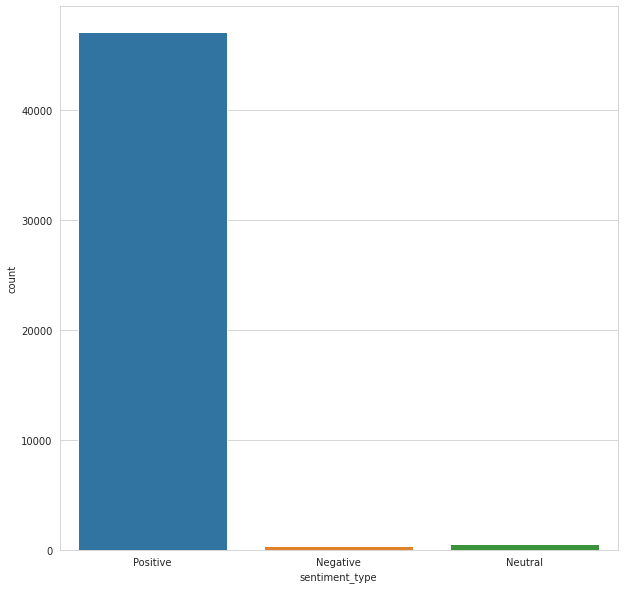

In [48]:
def f(df_reviews):
    if df_reviews['polarity'] > 0:
        val = "Positive"
    elif df_reviews['polarity'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_reviews['sentiment_type'] = df_reviews.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="sentiment_type", data=df_reviews)

In [53]:
df_reviews[df_reviews['sentiment_type']=='Neutral'][:10].style.bar(subset=['polarity'], align='mid', color=['#d65f5f', '#5fba7d'])

,listing_id,reviewer_id,comments,text_length,language,polarity,sentiment_type
229,4952,4130118,the host provided a key to the property and upon arrival provided for a tour of the property the host often met us at the door as we returned for the evening,157,en,0.000000,Neutral
259,4952,110497961,convenient place for visiting stanford,38,en,0.000000,Neutral
293,2894634,124911060,mountain view,32,en,0.000000,Neutral
342,2894634,12141334,vic is a very attentive host,28,en,0.000000,Neutral
525,2983703,219326,very handy to downtown mountain view aka known as old mountain view very walkable and public transportation is availablethanks for the hospitality,147,en,0.000000,Neutral
552,21373,2184084,this is a spectacular place with spectacular people,51,en,0.000000,Neutral
593,1364787,136847697,it was indeed a cozy room,25,en,0.000000,Neutral
819,21373,186496708,incredible place with incredible people,40,en,0.000000,Neutral
1136,40560,1192820,nothing to add to these reviews,31,en,0.000000,Neutral
1221,3143994,83619745,this was my second time staying at elss condo it was just as impeccable as the first,85,en,0.000000,Neutral


In [50]:
df_reviews = df_reviews[~df_reviews['comments'].str.endswith(('is an automated posting'))]

In [55]:
df_reviews[df_reviews['sentiment_type']=='Neutral'][:15].style.bar(subset=['polarity'], align='mid', color=['#d65f5f', '#5fba7d'])

,listing_id,reviewer_id,comments,text_length,language,polarity,sentiment_type
229,4952,4130118,the host provided a key to the property and upon arrival provided for a tour of the property the host often met us at the door as we returned for the evening,157,en,0.000000,Neutral
259,4952,110497961,convenient place for visiting stanford,38,en,0.000000,Neutral
293,2894634,124911060,mountain view,32,en,0.000000,Neutral
342,2894634,12141334,vic is a very attentive host,28,en,0.000000,Neutral
525,2983703,219326,very handy to downtown mountain view aka known as old mountain view very walkable and public transportation is availablethanks for the hospitality,147,en,0.000000,Neutral
552,21373,2184084,this is a spectacular place with spectacular people,51,en,0.000000,Neutral
593,1364787,136847697,it was indeed a cozy room,25,en,0.000000,Neutral
819,21373,186496708,incredible place with incredible people,40,en,0.000000,Neutral
1136,40560,1192820,nothing to add to these reviews,31,en,0.000000,Neutral
1221,3143994,83619745,this was my second time staying at elss condo it was just as impeccable as the first,85,en,0.000000,Neutral


In [56]:
pos_reviews = df_reviews[df_reviews['sentiment_type']=='Positive']

In [57]:
neg_reviews = df_reviews[df_reviews['sentiment_type']=='Negative']

In [58]:
pos_reviews =  ''.join(pos_reviews['comments'])

In [62]:
neg_reviews =  ''.join(neg_reviews['comments'])

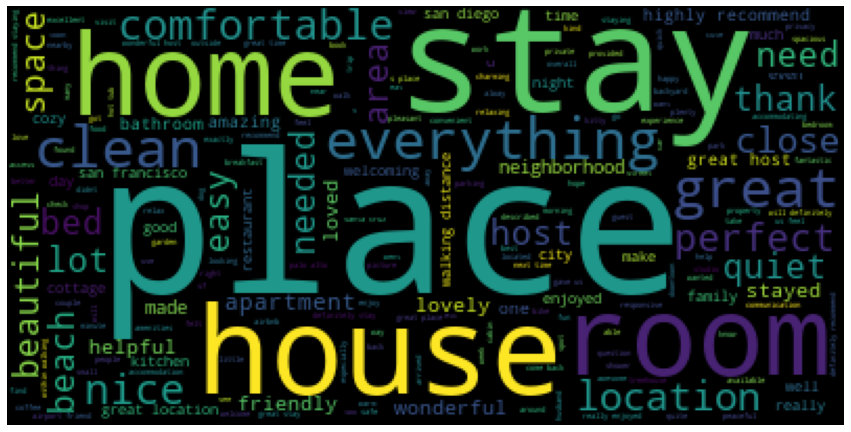

In [61]:
from wordcloud.wordcloud import STOPWORDS
pos_wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(pos_reviews)

plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(pos_wordcloud)

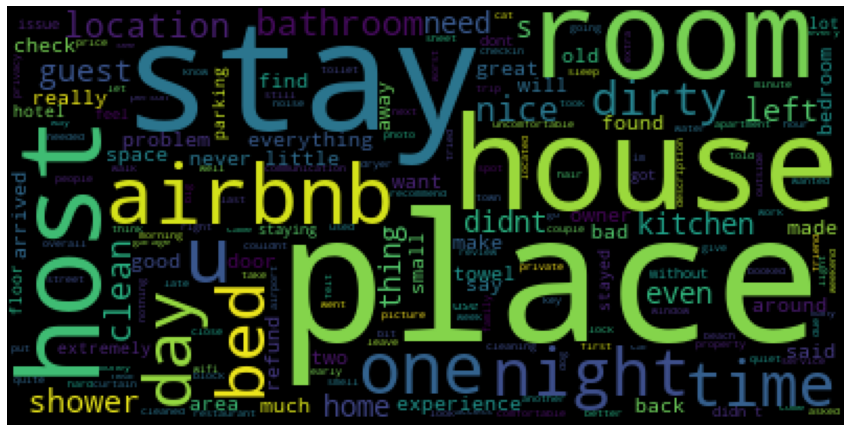

In [63]:
neg_wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(neg_reviews)

plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(neg_wordcloud)

In [ ]:
#df_reviews.to_csv('df_reviews_polarity.csv', index=False)

In [170]:
from nltk.util import ngrams

def ngram_convertor(df,n=3):

  def ngramconvert(df,n=3):
    for item in df.columns:
        df['new'+item]=df[item].apply(lambda sentence: list(ngrams(sentence.split(), n)))
    return df

In [197]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

In [198]:
# Remove Stopwords
#df_reviews['comments'] = df_reviews.str.replace("[^\w\s]", "")
df_reviews['comments'] = df_reviews['comments'].apply(lambda words: [word for word in words if word not in stop])

In [139]:
from nltk.stem.wordnet import WordNetLemmatizer

tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
   return [lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text)]

df_reviews['comments'] = df_reviews.comments.apply(lemmatize_text)

#df_reviews = dataset.assign(col_lemma = dataset.col.apply(lambda x: lemmatize(x))

In [153]:
df_reviews['comments'] = df_reviews['comments'].apply(str)